In [9]:
%matplotlib notebook

import pathlib
from scipy import interpolate as interp
import pythtb as pytb

import sim_tb as stb
import bz_utilities as bzu
import toy_models as toy
import plot_utils as pltu
import linear_response as lr

factor_shc = 7.029e3 # Recorver physiucal units in conductivity

In [3]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)

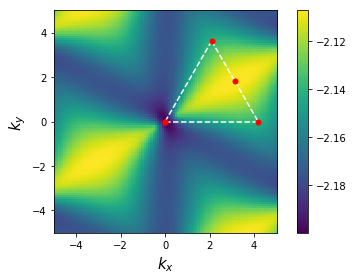

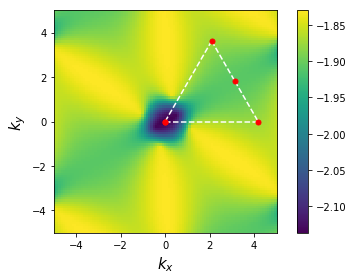

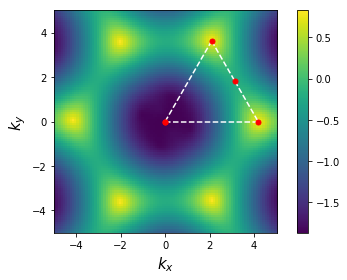

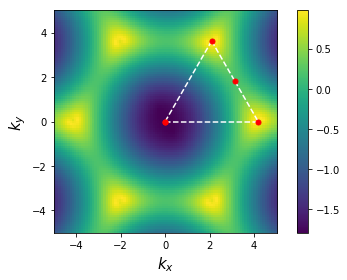

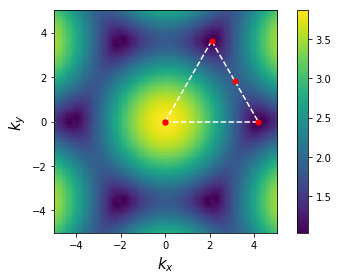

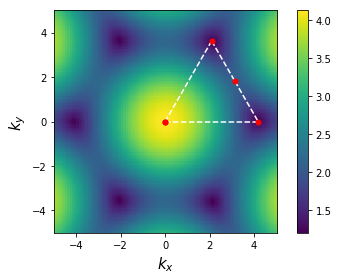

In [3]:
for index_band in range(6):
    fig2, ax2 = plt.subplots()
    Sim.plot_bands_2d(index_band, fig=fig2,ax=ax2, nk=100)
    fig2.tight_layout()
    
    fig2.savefig(Sim.path / "bands" / "band_{}.png".format(index_band))
plt.show()

## Band structure with and without SOC

<IPython.core.display.Javascript object>


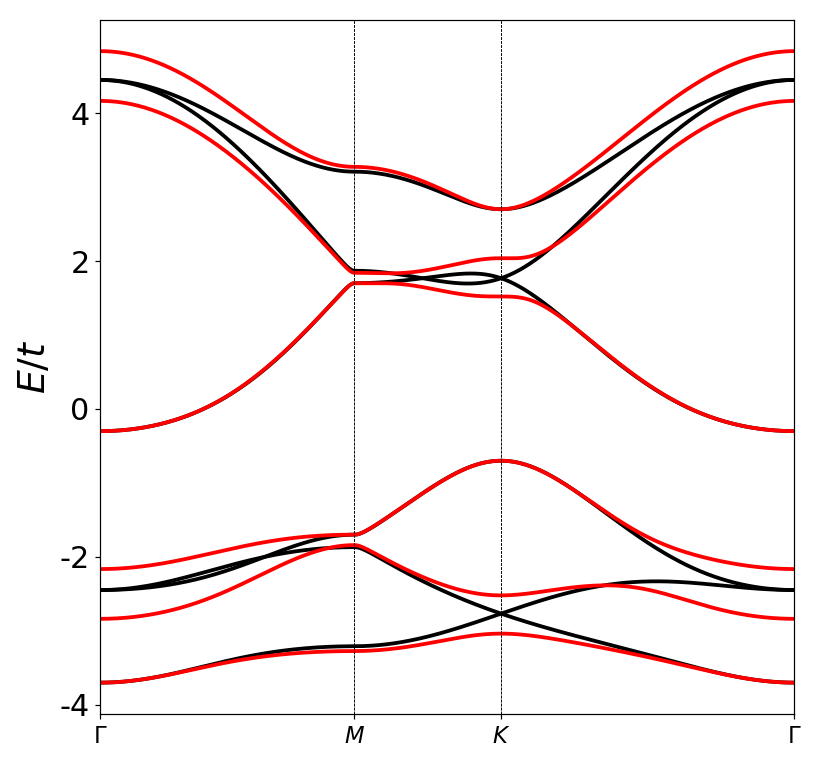

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7))
t, J, t2 = 1.0, 1.7, 0.0
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.plot_bands(ax, color="black",lw=2.5)

t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.plot_bands(ax, color="red", lw=2.5)

ax.set_ylabel(r"$E/t$", fontsize=25)

pltu.set_ticks_on_ax(ax, [-4, -2, 0, 2, 4], fs=20, axis="y")


fig.tight_layout()
path_fig = pathlib.Path(toy.ROOT_DIR)  / "saved_plots/kagome/"
toy.mk_dir(path_fig)
fig.savefig(path_fig /"band_structure_kagome.png")
plt.show()






In [10]:
t, J, t2 = 1.0, 1.7, 0.0
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.set_fermi_lvl()

#Sim.create_wf_grid(100)
#v_grid = Sim.velocity_operator_grid()
#Js_grid = Sim.spin_current_grid()


<IPython.core.display.Javascript object>


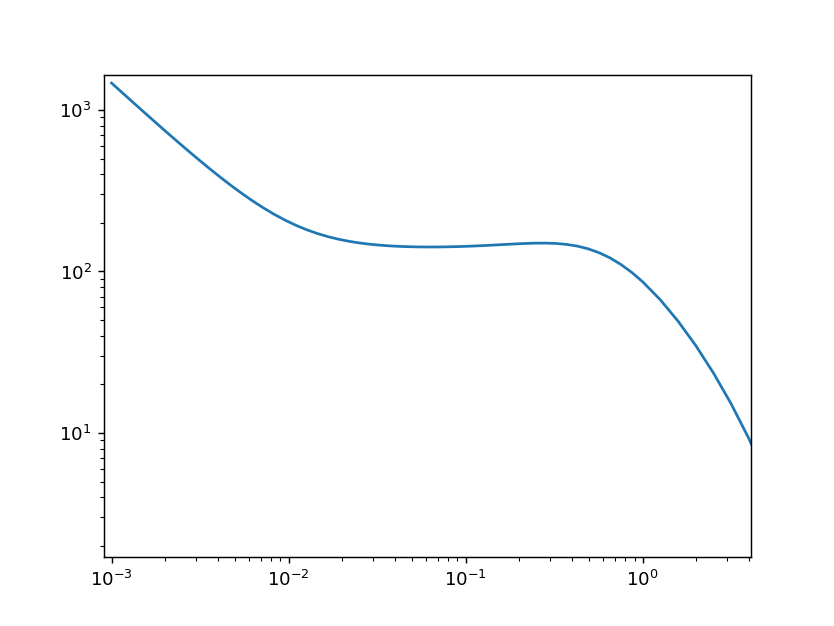

In [15]:
def load_conductivity(Sim, component, mode="s", absolute=False):
    """
    Load a component of the conductivity tensor (spion or charge)
    saved in the simulation directory.
    Parameters:
    -----------
    	Sim: (stb.Simulation_TB)
        	Simulation which contains calculated
            conductivity.
        component: (tuple of len 2 or 3)
        	Component of the conductivity tensor.
            "s": two comoponents.
            "c": three components.
        mode: (str, default is "s")
        	"s" refers to spin conductivity.
            "c" refers to charge conductivity.
        absolute: (bool, default is False)
        	If True, the absolute value of the conductivity
            is plotted. Ignoring the sign.
            
        Returns:
        --------
        	gamma: (np.ndarray)
            conduct: (np.ndarray)
            err: (np.ndarray)
        """
    factor = 7.029e3
    str_mode = {"s":"spin", "c":"charge"}[mode]
    path = Sim.path / "{}_conductivity/".format(str_mode)
    name_file = {"s":"SHC_{}{}{}.npy",
                 "c":"CHC_{}{}.npy"}[mode]
    name_file = name_file.format(*component)
    integ = np.load(path / name_file)
    gamma = integ[:, 0]
    conduct = factor * integ[:, 1]
    if absolute:
        conduct = np.abs(conduct)
    err = factor * integ[:, 2]
    return gamma, conduct, err

def spin_current_angle(Sim, component):
    """
    """
    gamma_c, c_conduct = load_conductivity(Sim, (component[2], component[2]), mode="c")[0:2]
    gamma_s, s_conduct = load_conductivity(Sim, component, mode="s")[0:2]
    print(len(gamma_s), len(gamma_c))
    test = np.sum(gamma_c-gamma_s)
    if test > 1e-9:
        raise Exception("Conductutities were calculated in different gamma arrays.")
    sc_angle = s_conduct / c_conduct
    return gamma_c, sc_angle
                                           
    
    

fig, ax = plt.subplots()
#gamma, sc_angle = spin_current_angle(Sim, (1,0,0))
#ax.plot(gamma, sc_angle)

gamma, conduct, err = load_conductivity(Sim, (0,1,0), mode="s")
ax.plot(gamma, np.abs(conduct))
                                 


#ratio = shc_arr_100 / shc_arr_200
ax.set_xscale("log")
ax.set_yscale("log")
#plt.show()

#print(gamma[36])
#print(s_conduct[36])
#print(c_conduct[36])

## Plot spin conductivity integrand in the 1BZ

In [ ]:
nk = 100
k = np.linspace(0, 1, num=nk)
sigma_k = np.zeros((nk, nk))
for k1 in k:
    for k2 in k:
        sigma_k = 0

## Integrating Berry Curvature in the 1BZ: 
### ¿Can we get an integer number?
### Yes! It integrates an integer.

<IPython.core.display.Javascript object>


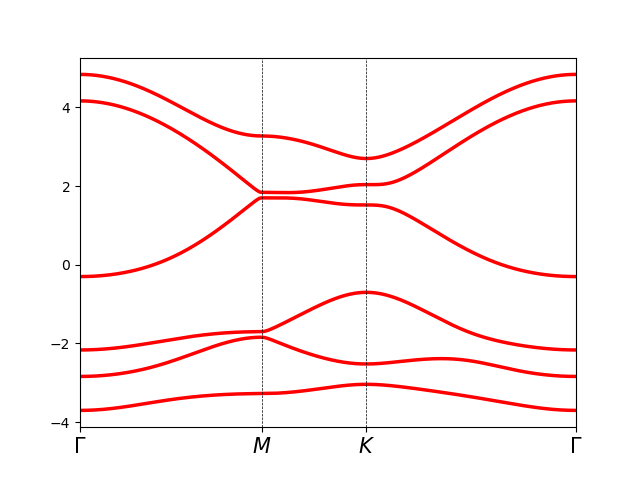

In [3]:
t, J, t2 = 1.0, 1.7, 0.2
mag_mode = "coplanar"
path = toy.init_kagome_model(t, J, t2, mag_mode)
Sim = stb.Simulation_TB(path)
Sim.set_fermi_lvl()
fig, ax = plt.subplots()
Sim.plot_bands(ax, color="red", lw=2.5)

In [4]:
C = Sim.chern_number(0)[0]
print(C)

-0.02193667961339618


## Chern's number on each band:

###     C[0] = -1
###     C[1] = 3
###     C[2] = -2
###     C[3] = -2
###     C[4] = 3
###     C[5] = -2 


In [8]:
hbar = 1.054e-34
e_charge = 1.602e-19
e_charge**2 / hbar/(4e-8) * (2/np.sqrt(3))

7029.003986002527